# CSI: Assignment 5

## Data Preprocessing and feature engineering on housing dataset
### by Dhananjay Singh

In [ ]:
#  1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For label encoding
from sklearn.preprocessing import LabelEncoder
sns.set(style="whitegrid")



In [ ]:
#  2: Load Dataset
df = pd.read_csv('train.csv')  
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#  3: Overview
print(df.shape)
print(df.dtypes.value_counts())
df

(1460, 81)
object     43
int64      35
float64     3
Name: count, dtype: int64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
#  4: Check Missing Values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)



PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [178]:
# Fill categorical missing values with 'None'
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna('None')

# Fill numerical missing values with median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [179]:
# Label Encoding for ordinal columns
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 
                'GarageCond', 'PoolQC', 'Fence']

ordinal_map = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0
}

for col in ordinal_cols:
    df[col] = df[col].map(ordinal_map)

# One-Hot Encoding for nominal categorical columns
nominal_cols = list(set(cat_cols) - set(ordinal_cols))
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)


In [180]:
# New Features
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['TotalBath'] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])
df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['Age'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']


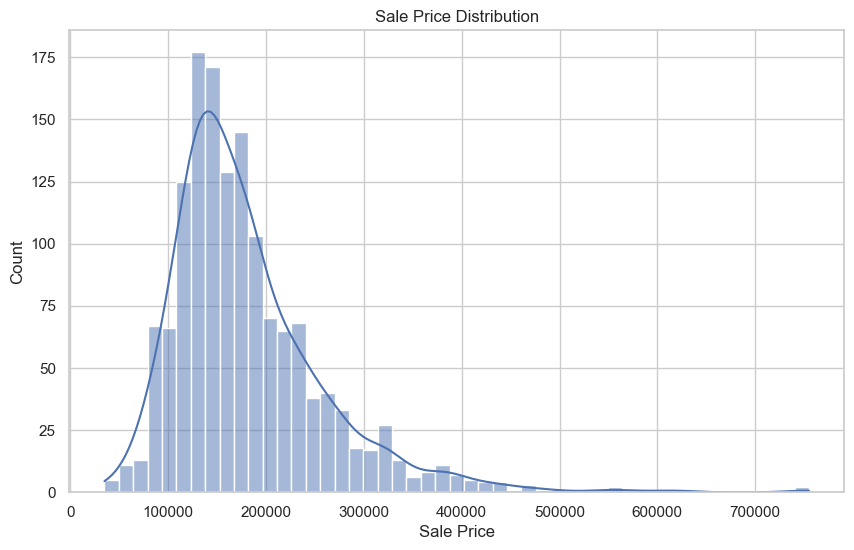

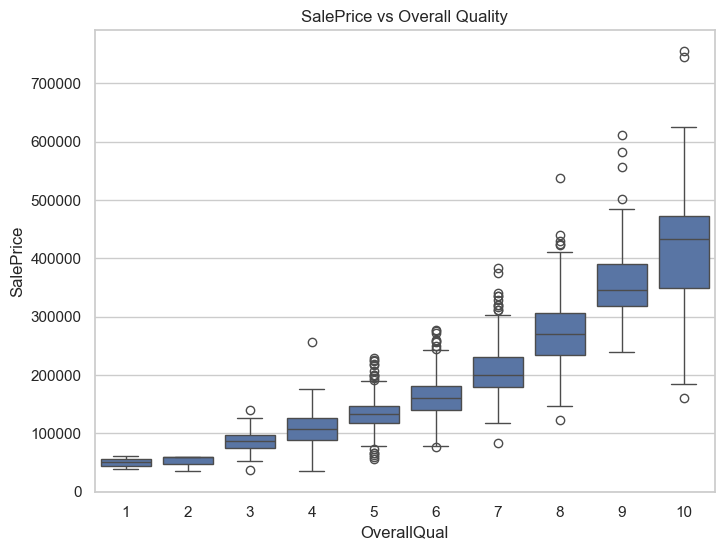

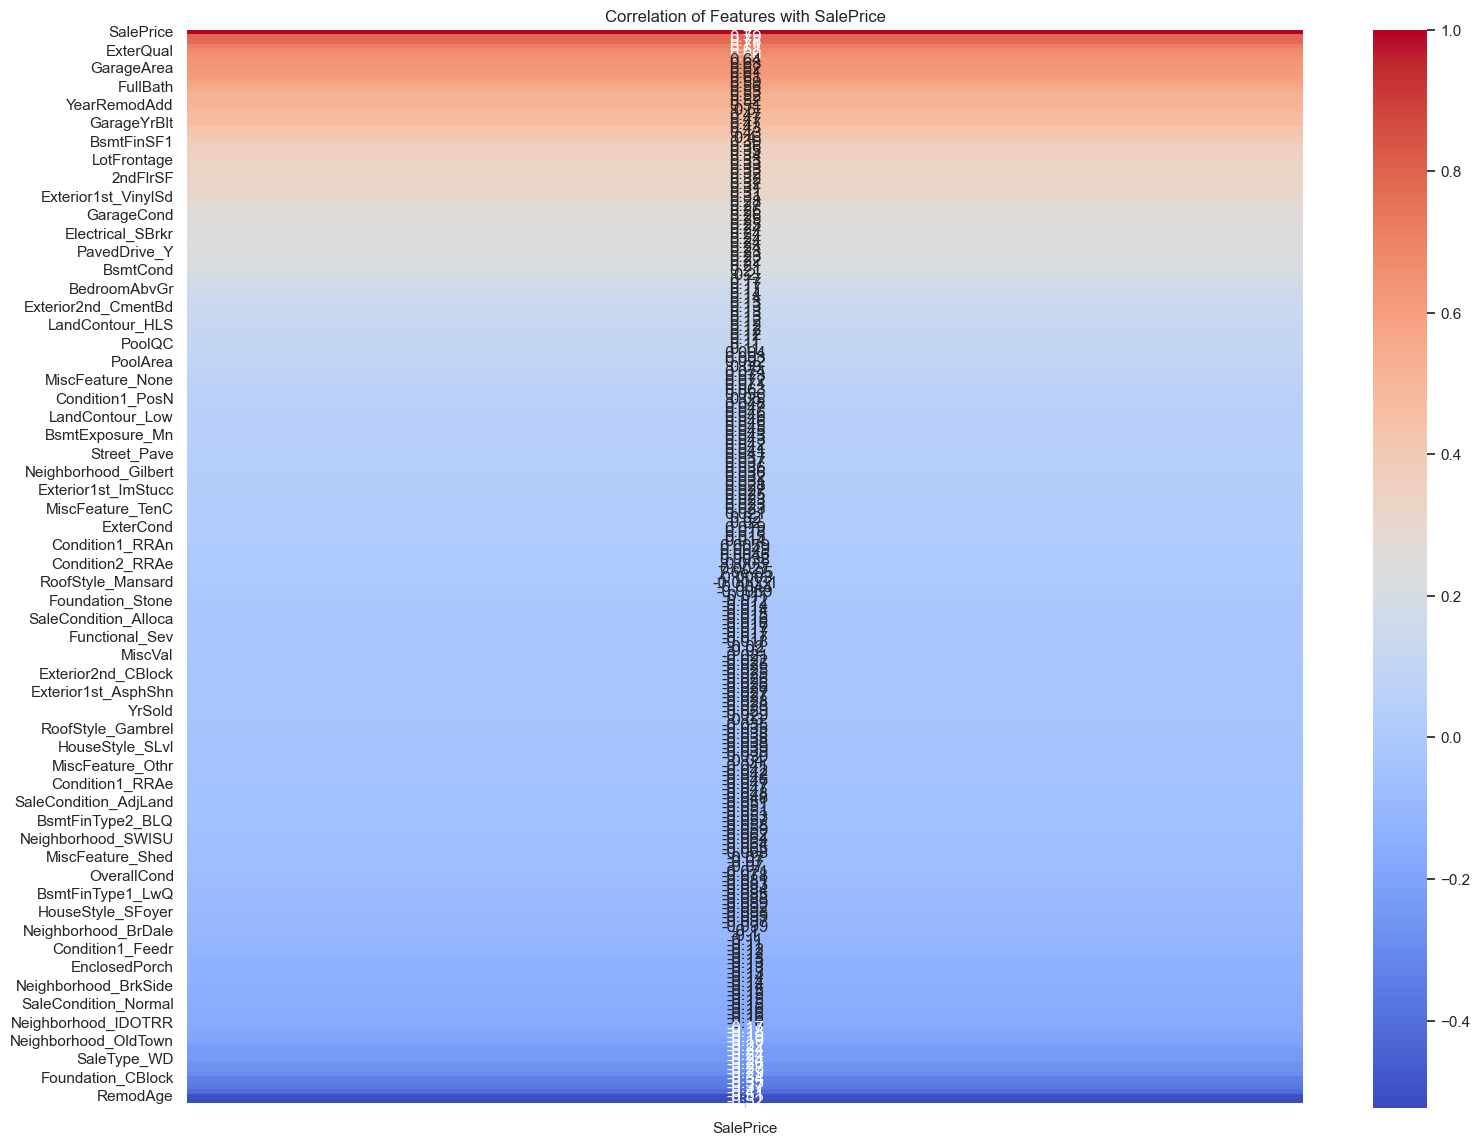

In [181]:
# Distribution of SalePrice
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True)
plt.title("Sale Price Distribution")
plt.xlabel("Sale Price")
plt.show()

# SalePrice vs Overall Quality
plt.figure(figsize=(8,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title("SalePrice vs Overall Quality")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(18,14))
corr = df.corr()
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with SalePrice")
plt.show()


In [182]:
# Final dataset ready for modeling
print("Final shape:", df.shape)
df.to_csv("processed_housing_data.csv", index=False)


Final shape: (1460, 235)


In [ ]:
#  1: Drop 'Id' and keep y
X = df.drop(columns=['Id', 'SalePrice'])
y = df['SalePrice']

#  2: Fix any remaining NaNs
X = X.fillna(X.mean())  # or you can use .fillna(X.mean()) for numerical, up to you

# Optional: standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  3: Feature selection
from sklearn.feature_selection import SelectKBest, f_regression
k = 40  # top features
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X_scaled, y)

#  4: Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()

#  5: Recreate DataFrame
df_reduced = pd.DataFrame(X_selected, columns=selected_features)
df_reduced['SalePrice'] = y.reset_index(drop=True)

print("✅ Final shape after SelectKBest:", df_reduced.shape)
print("📋 Selected features:", selected_features)




✅ Final shape after SelectKBest: (1460, 41)
📋 Selected features: ['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageFinish_Unf', 'Foundation_CBlock', 'Foundation_PConc', 'MasVnrType_None', 'MasVnrType_Stone', 'BsmtFinType1_GLQ', 'SaleCondition_Partial', 'SaleType_New', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'BsmtExposure_Gd', 'TotalSF', 'TotalBath', 'Age', 'RemodAge']


In [ ]:
#  1: Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  2: Split data
X = df_reduced.drop(columns=['SalePrice'])
y = df_reduced['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  3: Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#  4: Predictions
y_pred = lr_model.predict(X_test)

#  5: Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Linear Regression Performance:")
print(f"R² Score     : {r2:.4f}")
print(f"MAE          : {mae:.2f}")
print(f"MSE          : {mse:.2f}")
print(f"RMSE         : {rmse:.2f}")


📊 Linear Regression Performance:
R² Score     : 0.8551
MAE          : 21429.68
MSE          : 1111738909.14
RMSE         : 33342.75


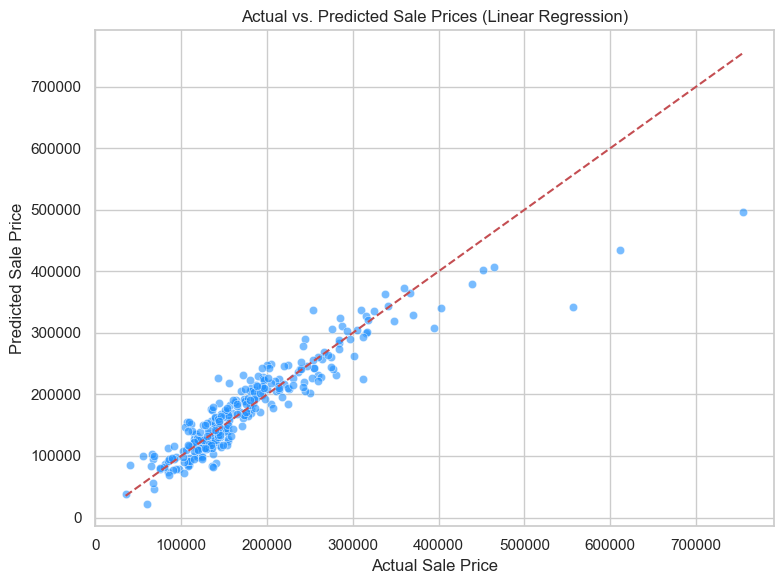

In [185]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='dodgerblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Prices (Linear Regression)')
plt.tight_layout()
plt.show()


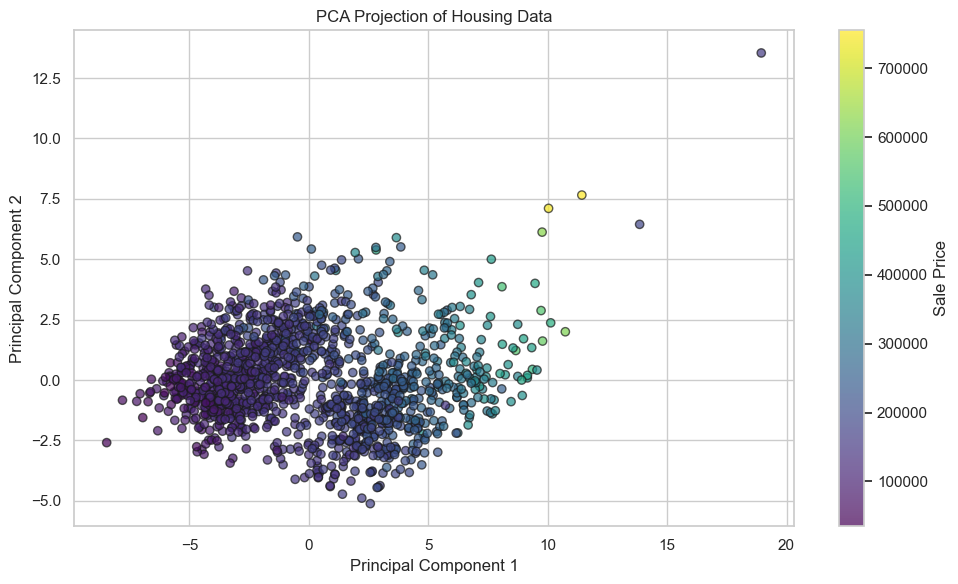

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#  1: Scale features (PCA is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_reduced.drop(columns=['SalePrice']))

#  2: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#  3: Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_reduced['SalePrice'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.colorbar(scatter, label='Sale Price')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Housing Data')
plt.grid(True)
plt.tight_layout()
plt.show()



In [187]:
# Original dataframe copy (assuming you saved it before transforming)
original_df = pd.read_csv('train.csv')

print("🧾 Original Data:")
print(f"Shape: {original_df.shape}")
print(f"Missing values:\n{original_df.isnull().sum()[original_df.isnull().sum() > 0]}")
print("\nData types:\n", original_df.dtypes.value_counts())

print("\n🧪 Preprocessed Data:")
print(f"Shape: {df_reduced.shape}")
print(f"Any missing? {df_reduced.isnull().sum().sum() > 0}")


🧾 Original Data:
Shape: (1460, 81)
Missing values:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Data types:
 object     43
int64      35
float64     3
Name: count, dtype: int64

🧪 Preprocessed Data:
Shape: (1460, 41)
Any missing? False


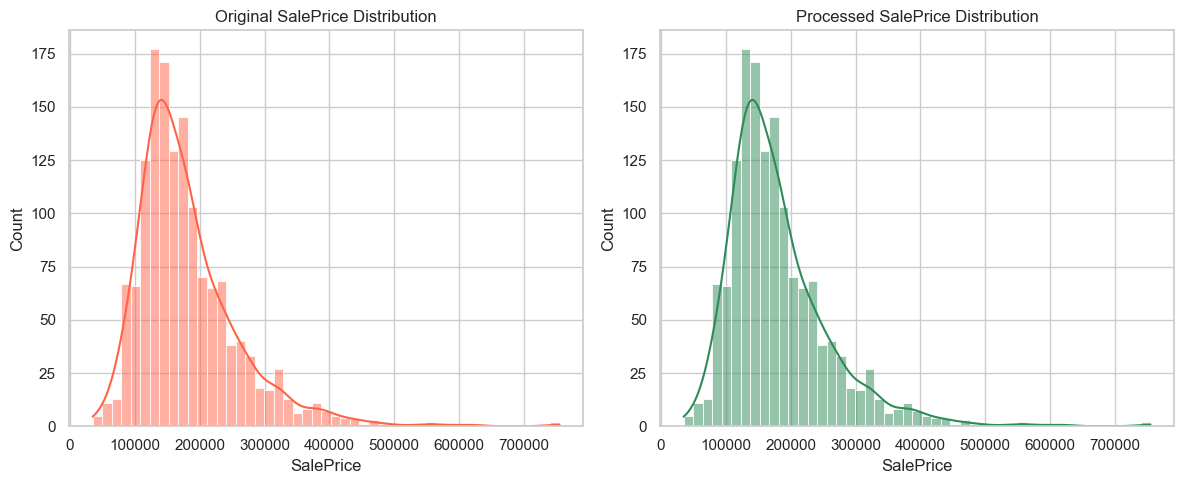

In [188]:
# Compare SalePrice before/after processing (should remain same)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(original_df['SalePrice'], kde=True, color='tomato')
plt.title('Original SalePrice Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_reduced['SalePrice'], kde=True, color='seagreen')
plt.title('Processed SalePrice Distribution')

plt.tight_layout()
plt.show()


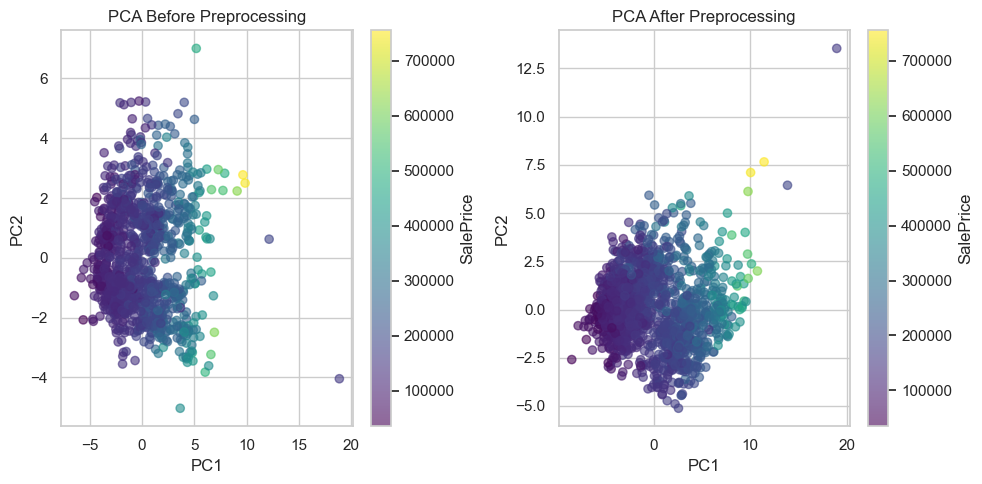

In [189]:
# Keep only numeric columns and drop NaNs
original_numeric = original_df.select_dtypes(include=[np.number]).dropna()

# Scale
scaled_original = StandardScaler().fit_transform(original_numeric.drop(columns=['Id', 'SalePrice'], errors='ignore'))

# PCA
pca_before = PCA(n_components=2).fit_transform(scaled_original)

# Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(pca_before[:, 0], pca_before[:, 1], c=original_numeric['SalePrice'], cmap='viridis', alpha=0.6)
plt.title("PCA Before Preprocessing")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='SalePrice')

# Already processed before
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_reduced['SalePrice'], cmap='viridis', alpha=0.6)
plt.title("PCA After Preprocessing")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='SalePrice')

plt.tight_layout()
plt.show()



In [ ]:
comparison_summary = pd.DataFrame({
    'Aspect': [
        'Shape', 'Missing Values', 'Categorical Columns', 'Numerical Columns', 'Model-Ready'
    ],
    'Before': [
        f"{original_df.shape}", 
        original_df.isnull().sum().sum(),
        original_df.select_dtypes(include='object').shape[1],
        original_df.select_dtypes(include=[np.number]).shape[1],
        "❌"
    ],
    'After': [
        f"{df_reduced.shape}",
        df_reduced.isnull().sum().sum(),
        0,  # All encoded to numerical
        df_reduced.shape[1] - 1,  
        "✅"
    ]
})
print(comparison_summary.to_string(index=False))


             Aspect     Before      After
              Shape (1460, 81) (1460, 41)
     Missing Values       7829          0
Categorical Columns         43          0
  Numerical Columns         38         40
        Model-Ready          ❌          ✅
